In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer = pd.read_csv('kunden.csv', delimiter= ';')
table_customer = pd.DataFrame(customer)

visitor = pd.read_csv('besucher.csv', delimiter= ';', decimal= ',')
table_visitor = pd.DataFrame(visitor)

geodata = pd.read_csv('geo.txt', delimiter= '\t')
table_geo = pd.DataFrame(geodata)

print(table_customer)
print(table_visitor)
print(table_geo)

      Alter  Einkommen      Preis  Geschlecht  Zeit KundeNr
0        64    66894.0   88160.31         1.0  43.0   K0310
1        54    77644.0  103145.70         1.0  40.0   K1042
2        55    44341.0   80565.16         0.0  37.0   K0382
3        49    67271.0   83949.89         0.0  42.0   K0498
4        46    49832.0   93781.58         0.0  41.0   K0552
...     ...        ...        ...         ...   ...     ...
1099     70    69581.0  103751.58         1.0  51.0   K0467
1100     38    48301.0   64230.98         1.0  33.0   K0122
1101     67    63547.0  103123.57         1.0  41.0   K1045
1102     37    32686.0   49215.87         1.0  36.0   K1096
1103     55    71240.0  106132.59         1.0  49.0   K0861

[1104 rows x 6 columns]
     Alter     Einkommen  Geschlecht  Zeit KundeNr
0       30  39919.095335           0  29.0   K1814
1       41  53430.673086           0  27.0   K1544
2       64  73163.216927           0  32.0   K1945
3       41  36761.482581           0  44.0   K1825


In [3]:
 ## überschneiden sich die KundeNr

In [4]:
sum_rows = (1104+891)

print(sum_rows)

1995


In [5]:
print(table_customer.sort_values('KundeNr'))
print(table_visitor.sort_values('KundeNr'))

     Alter  Einkommen      Preis  Geschlecht  Zeit KundeNr
476     68    89437.0  114481.90         1.0  62.0   K0001
892     58    65271.0  106258.99         1.0  44.0   K0002
225     44    48195.0   85705.57         1.0  29.0   K0003
174     37    48957.0   76412.36         0.0  36.0   K0004
991     50    56621.0   92898.67         0.0  40.0   K0005
..     ...        ...        ...         ...   ...     ...
240     61    82624.0  134755.80         1.0  59.0   K1100
422     39    37905.0   61717.86         1.0  32.0   K1101
758     39    40159.0   67170.69         1.0  37.0   K1102
813     48    45545.0   75700.83         0.0  30.0   K1103
829     63    80414.0  101554.64         1.0  49.0   K1104

[1104 rows x 6 columns]
     Alter     Einkommen  Geschlecht  Zeit KundeNr
454     42  57149.498007           0  35.0   K1105
812     34  43358.564350           1  33.0   K1106
229     33  45748.426936           1  55.0   K1107
400     57  58633.969764           1  32.0   K1108
744     43  

In [6]:
table_customer_resorted = table_customer[['KundeNr', 'Geschlecht', 'Alter', 'Einkommen', 'Preis', 'Zeit']]
table_customer_sort_by_KNr = table_customer_resorted.sort_values('KundeNr')

table_visitor_resorted = table_visitor[['KundeNr', 'Geschlecht', 'Alter', 'Einkommen', 'Zeit']]
table_visitor_sort_by_KNr = table_visitor_resorted.sort_values('KundeNr')

print(table_customer_sort_by_KNr)
print(table_visitor_sort_by_KNr)

    KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit
476   K0001         1.0     68    89437.0  114481.90  62.0
892   K0002         1.0     58    65271.0  106258.99  44.0
225   K0003         1.0     44    48195.0   85705.57  29.0
174   K0004         0.0     37    48957.0   76412.36  36.0
991   K0005         0.0     50    56621.0   92898.67  40.0
..      ...         ...    ...        ...        ...   ...
240   K1100         1.0     61    82624.0  134755.80  59.0
422   K1101         1.0     39    37905.0   61717.86  32.0
758   K1102         1.0     39    40159.0   67170.69  37.0
813   K1103         0.0     48    45545.0   75700.83  30.0
829   K1104         1.0     63    80414.0  101554.64  49.0

[1104 rows x 6 columns]
    KundeNr  Geschlecht  Alter     Einkommen  Zeit
454   K1105           0     42  57149.498007  35.0
812   K1106           1     34  43358.564350  33.0
229   K1107           1     33  45748.426936  55.0
400   K1108           1     57  58633.969764  32.0
744   K1109 

In [7]:
customer_merge = pd.merge(table_customer_sort_by_KNr, table_geo, on = 'KundeNr', how = 'outer')
customer_geo = customer_merge.head(1005)
visitor_merge = pd.merge(table_visitor_sort_by_KNr, table_geo, on='KundeNr', how='outer')
visitor_geo = visitor_merge.head(891)

print("outer join:\n", customer_geo)
print("outer Join:\n", visitor_geo)

outer join:
      KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit      Niederlassung
0      K0001         1.0   68.0    89437.0  114481.90  62.0            Sachsen
1      K0002         1.0   58.0    65271.0  106258.99  44.0                NRW
2      K0003         1.0   44.0    48195.0   85705.57  29.0             Hessen
3      K0004         0.0   37.0    48957.0   76412.36  36.0             Bayern
4      K0005         0.0   50.0    56621.0   92898.67  40.0             Bayern
...      ...         ...    ...        ...        ...   ...                ...
1000   K1001         0.0   55.0    66861.0   97465.12  54.0             Bayern
1001   K1002         0.0   41.0    38996.0   66237.40  28.0             Bayern
1002   K1003         1.0   55.0    60489.0  105741.80  47.0             Bayern
1003   K1004         1.0   42.0    41463.0   74976.67  43.0  Baden-Württemberg
1004   K1005         1.0   69.0    84021.0  133358.19  56.0  Baden-Württemberg

[1005 rows x 7 columns]
outer Join:
  

In [8]:
customer_isna_rows = customer_geo[customer_geo.isna().any(axis = 1)]
print("Zeilen mit mindestens einem NaN-Wert:")
print(customer_isna_rows)

print(
    )
visitor_isna_rows = visitor_geo[visitor_geo.isna().any(axis = 1)]
print("Zeilen mit mindestens einem NaN-Wert:")
print(visitor_isna_rows)

Zeilen mit mindestens einem NaN-Wert:
    KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit  \
23    K0024         NaN   41.0    46542.0   63477.00  40.0   
89    K0090         NaN   64.0    83452.0  133180.70  62.0   
165   K0166         NaN   53.0    49798.0   61329.51  39.0   
324   K0325         NaN   52.0    66602.0   98756.07  45.0   
789   K0790         NaN   67.0    91461.0  131748.07  66.0   

           Niederlassung  
23     Baden-Württemberg  
89         Niedersachsen  
165  Nordrhein-Westfalen  
324               Bayern  
789               Berlin  

Zeilen mit mindestens einem NaN-Wert:
Empty DataFrame
Columns: [KundeNr, Geschlecht, Alter, Einkommen, Zeit, Niederlassung]
Index: []


In [9]:
counts = customer_geo['Geschlecht'].value_counts(normalize=True)
percentage_1 = counts.get(1.0, 0)
percentage_0 = counts.get(0.0, 0)

print(f"Prozentualer Anteil von 1.0: {percentage_1:.2%}")
print(f"Prozentualer Anteil von 0.0: {percentage_0:.2%}")

Prozentualer Anteil von 1.0: 63.20%
Prozentualer Anteil von 0.0: 36.80%


In [10]:
nan_indices = customer_geo[customer_geo['Geschlecht'].isnull()].index
replacement_values = np.random.choice([1.0, 0.0], size=len(nan_indices), p=[percentage_1, percentage_0])
customer_geo.loc[nan_indices, 'Geschlecht'] = replacement_values
customer_geo_noNaN = customer_geo.rename(columns={'Geschlecht': 'customer_geo_noNaN'})

customer_geo_noNaN = customer_geo
visitor_geo_noNaN = visitor_geo

print(customer_geo_noNaN)
print(visitor_geo_noNaN)

     KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit      Niederlassung
0      K0001         1.0   68.0    89437.0  114481.90  62.0            Sachsen
1      K0002         1.0   58.0    65271.0  106258.99  44.0                NRW
2      K0003         1.0   44.0    48195.0   85705.57  29.0             Hessen
3      K0004         0.0   37.0    48957.0   76412.36  36.0             Bayern
4      K0005         0.0   50.0    56621.0   92898.67  40.0             Bayern
...      ...         ...    ...        ...        ...   ...                ...
1000   K1001         0.0   55.0    66861.0   97465.12  54.0             Bayern
1001   K1002         0.0   41.0    38996.0   66237.40  28.0             Bayern
1002   K1003         1.0   55.0    60489.0  105741.80  47.0             Bayern
1003   K1004         1.0   42.0    41463.0   74976.67  43.0  Baden-Württemberg
1004   K1005         1.0   69.0    84021.0  133358.19  56.0  Baden-Württemberg

[1005 rows x 7 columns]
    KundeNr  Geschlecht  Al

In [11]:
customer_isna_rows = customer_geo[customer_geo.isna().any(axis = 1)]
print("Zeilen mit mindestens einem NaN-Wert:")
print(customer_isna_rows)

Zeilen mit mindestens einem NaN-Wert:
Empty DataFrame
Columns: [KundeNr, Geschlecht, Alter, Einkommen, Preis, Zeit, Niederlassung]
Index: []


In [12]:
print(customer_geo.dtypes)

print(
    )

print(visitor_geo.dtypes)

KundeNr           object
Geschlecht       float64
Alter            float64
Einkommen        float64
Preis            float64
Zeit             float64
Niederlassung     object
dtype: object

KundeNr           object
Geschlecht       float64
Alter            float64
Einkommen        float64
Zeit             float64
Niederlassung     object
dtype: object


In [13]:
print("Sind alle Werte für 'Geschlecht', 'Alter' und 'Zeit' in customer_geo ganzzahlig?")
print(
    )
columns_are_int_a = ['Geschlecht', 'Alter', 'Zeit']

for col in columns_are_int_a:
    customer_geo_is_int = customer_geo_noNaN[col].apply(lambda x: np.equal(x, np.round(x))).all()
    
    if customer_geo_is_int:
        print(f"Alle Werte in der Spalte '{col}' sind ganze Zahlen.")
    else:
        print(f"Nicht alle Werte in der Spalte '{col}' sind ganze Zahlen.")
print(
    )
print("Sind alle Werte für 'Geschlecht', 'Alter' und 'Zeit' in visitor_geo ganzzahlig?")
print(
    )
columns_are_int_b = ['Geschlecht', 'Alter', 'Zeit']

for col in columns_are_int_b:
    visitor_geo_is_int = visitor_geo_noNaN[col].apply(lambda x: np.equal(x, np.round(x))).all()
    
    if visitor_geo_is_int:
        print(f"Alle Werte in der Spalte '{col}' sind ganze Zahlen.")
    else:
        print(f"Nicht alle Werte in der Spalte '{col}' sind ganze Zahlen.")

Sind alle Werte für 'Geschlecht', 'Alter' und 'Zeit' in customer_geo ganzzahlig?

Alle Werte in der Spalte 'Geschlecht' sind ganze Zahlen.
Alle Werte in der Spalte 'Alter' sind ganze Zahlen.
Alle Werte in der Spalte 'Zeit' sind ganze Zahlen.

Sind alle Werte für 'Geschlecht', 'Alter' und 'Zeit' in visitor_geo ganzzahlig?

Alle Werte in der Spalte 'Geschlecht' sind ganze Zahlen.
Alle Werte in der Spalte 'Alter' sind ganze Zahlen.
Alle Werte in der Spalte 'Zeit' sind ganze Zahlen.


In [14]:
print("Also convertieren wir diese Spalten in integer")
print(
    )
customer_geo_retype = customer_geo.astype({'Geschlecht': int, 'Alter': int, 'Zeit': int})
print(customer_geo_retype)
print(
    )
print(customer_geo_retype.dtypes)
print(
    )
visitor_geo_retype = visitor_geo.astype({'Geschlecht': int, 'Alter': int, 'Zeit': int})
print(visitor_geo_retype)
print(
    )
print(visitor_geo_retype.dtypes)

Also convertieren wir diese Spalten in integer

     KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit      Niederlassung
0      K0001           1     68    89437.0  114481.90    62            Sachsen
1      K0002           1     58    65271.0  106258.99    44                NRW
2      K0003           1     44    48195.0   85705.57    29             Hessen
3      K0004           0     37    48957.0   76412.36    36             Bayern
4      K0005           0     50    56621.0   92898.67    40             Bayern
...      ...         ...    ...        ...        ...   ...                ...
1000   K1001           0     55    66861.0   97465.12    54             Bayern
1001   K1002           0     41    38996.0   66237.40    28             Bayern
1002   K1003           1     55    60489.0  105741.80    47             Bayern
1003   K1004           1     42    41463.0   74976.67    43  Baden-Württemberg
1004   K1005           1     69    84021.0  133358.19    56  Baden-Württemberg

[10

In [15]:
print("Sind alle Werte für 'Einkommen' und 'Preis' in customer_geo ganzzahlig?")
print(
    )
columns_are_int_c = ['Einkommen', 'Preis']

for col in columns_are_int_c:
    customer_geo_is_int_c = customer_geo[col].apply(lambda x: np.equal(x, np.round(x))).all()
    
    if customer_geo_is_int_c:
        print(f"Alle Werte in der Spalte '{col}' sind ganze Zahlen.")
    else:
        print(f"Nicht alle Werte in der Spalte '{col}' sind ganze Zahlen.")
print(
    )

print("Sind alle Werte für 'Einkommen' in visitor_geo ganzzahlig?")
print(
    )
columns_are_int_d = ['Einkommen']

for col in columns_are_int_d:
    visitor_geo_is_int_d = visitor_geo[col].apply(lambda x: np.equal(x, np.round(x))).all()
    
    if visitor_geo_is_int_d:
        print(f"Alle Werte in der Spalte '{col}' sind ganze Zahlen.")
    else:
        print(f"Nicht alle Werte in der Spalte '{col}' sind ganze Zahlen.")

Sind alle Werte für 'Einkommen' und 'Preis' in customer_geo ganzzahlig?

Alle Werte in der Spalte 'Einkommen' sind ganze Zahlen.
Nicht alle Werte in der Spalte 'Preis' sind ganze Zahlen.

Sind alle Werte für 'Einkommen' in visitor_geo ganzzahlig?

Nicht alle Werte in der Spalte 'Einkommen' sind ganze Zahlen.


In [16]:
print("Welchen Datentyp haben 'Einkommen' und 'Preis'?")
print(
    )
print(customer_geo_retype.dtypes)

Welchen Datentyp haben 'Einkommen' und 'Preis'?

KundeNr           object
Geschlecht         int32
Alter              int32
Einkommen        float64
Preis            float64
Zeit               int32
Niederlassung     object
dtype: object


In [17]:
print("Da Einkommen und Preis Geldwerte sind convertieren wir diese als float mit zwei Decimalstellen.")
print(
    )
customer_geo_retype['Einkommen'] = pd.to_numeric(customer_geo_retype['Einkommen'], errors='coerce')
customer_geo_retype['Preis'] = pd.to_numeric(customer_geo_retype['Preis'], errors='coerce')

customer_geo_retype['Einkommen'] = customer_geo_retype['Einkommen'].astype(float)
customer_geo_retype['Preis'] = customer_geo_retype['Preis'].astype(float)

customer_geo_retype['Einkommen'] = customer_geo_retype['Einkommen'].round(2)
customer_geo_retype['Preis'] = customer_geo_retype['Preis'].round(2)

print("Customer")
print(customer_geo_retype)
print(
    )
print(customer_geo_retype.dtypes)
print(
    )
visitor_geo_retype['Einkommen'] = pd.to_numeric(visitor_geo_retype['Einkommen'], errors='coerce')

visitor_geo_retype['Einkommen'] = visitor_geo_retype['Einkommen'].astype(float)

visitor_geo_retype['Einkommen'] = visitor_geo_retype['Einkommen'].round(2)

print("Visitor")
print(visitor_geo_retype)
print(
    )
print(visitor_geo_retype.dtypes)

Da Einkommen und Preis Geldwerte sind convertieren wir diese als float mit zwei Decimalstellen.

Customer
     KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit      Niederlassung
0      K0001           1     68    89437.0  114481.90    62            Sachsen
1      K0002           1     58    65271.0  106258.99    44                NRW
2      K0003           1     44    48195.0   85705.57    29             Hessen
3      K0004           0     37    48957.0   76412.36    36             Bayern
4      K0005           0     50    56621.0   92898.67    40             Bayern
...      ...         ...    ...        ...        ...   ...                ...
1000   K1001           0     55    66861.0   97465.12    54             Bayern
1001   K1002           0     41    38996.0   66237.40    28             Bayern
1002   K1003           1     55    60489.0  105741.80    47             Bayern
1003   K1004           1     42    41463.0   74976.67    43  Baden-Württemberg
1004   K1005           1 

In [18]:
print("Treten unter den Values für 'Niederlassung Doppelungen auf?")
print(
    )
Niederlassung_unique_values_customer = customer_geo_retype['Niederlassung'].unique()
print(Niederlassung_unique_values_customer)
print(
    )
Niederlassung_unique_values_visitor = visitor_geo_retype['Niederlassung'].unique()
print(Niederlassung_unique_values_visitor)
print(
    )
print("Ja."" Wir fassen NRW; Nordrhein-westfalen unter Nordrhein-westfalen und BERLIN; Berlin-Charlottenburg; Berlin-Mitte; Berlin unter Berlin zusammen.")

Treten unter den Values für 'Niederlassung Doppelungen auf?

['Sachsen' 'NRW' 'Hessen' 'Bayern' 'Baden-Württemberg'
 'Nordrhein-Westfalen' 'Berlin' 'Niedersachsen' 'Brandenburg' 'Thüringen'
 'Hamburg' 'Düsseldorf' 'Berlin-Charlottenburg' 'Berlin-Mitte' 'BERLIN']

['Hessen' 'Berlin' 'Niedersachsen' 'Thüringen' 'Nordrhein-Westfalen'
 'Baden-Württemberg' 'Bayern' 'Hamburg' 'Sachsen' 'Brandenburg' 'BERLIN'
 'Düsseldorf' 'NRW' 'Berlin-Charlottenburg']

Ja. Wir fassen NRW; Nordrhein-westfalen unter Nordrhein-westfalen und BERLIN; Berlin-Charlottenburg; Berlin-Mitte; Berlin unter Berlin zusammen.


In [19]:
customer_geo_retype['Niederlassung'] = customer_geo_retype['Niederlassung'].replace({
    'NRW': 'Nordrhein-Westfalen',
    'BERLIN': 'Berlin',
    'Berlin-Charlottenburg': 'Berlin',
    'Berlin-Mitte': 'Berlin'
})

visitor_geo_retype['Niederlassung'] = visitor_geo_retype['Niederlassung'].replace({
    'NRW': 'Nordrhein-Westfalen',
    'BERLIN': 'Berlin',
    'Berlin-Charlottenburg': 'Berlin',
    'Berlin-Mitte': 'Berlin'
})
print("Customer")
print(customer_geo_retype)
print(
    )
print("Visitor")
print(visitor_geo_retype)

Customer
     KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit  \
0      K0001           1     68    89437.0  114481.90    62   
1      K0002           1     58    65271.0  106258.99    44   
2      K0003           1     44    48195.0   85705.57    29   
3      K0004           0     37    48957.0   76412.36    36   
4      K0005           0     50    56621.0   92898.67    40   
...      ...         ...    ...        ...        ...   ...   
1000   K1001           0     55    66861.0   97465.12    54   
1001   K1002           0     41    38996.0   66237.40    28   
1002   K1003           1     55    60489.0  105741.80    47   
1003   K1004           1     42    41463.0   74976.67    43   
1004   K1005           1     69    84021.0  133358.19    56   

            Niederlassung  
0                 Sachsen  
1     Nordrhein-Westfalen  
2                  Hessen  
3                  Bayern  
4                  Bayern  
...                   ...  
1000               Bayern  
1001      

In [20]:
print("Sind nun noch Doppelungen vorhanden?")
  
filtered_df_customer = customer_geo_retype[customer_geo_retype['Niederlassung'].isin(['Nordrhein-Westfalen', 'Berlin'])]
remaining_unwanted_values_customer = customer_geo_retype[customer_geo_retype['Niederlassung'].isin(['NRW', 'BERLIN', 'Berlin-Charlottenburg', 'Berlin-Mitte'])]

if not remaining_unwanted_values_customer.empty:
    print("\nUngewollte Werte gefunden:")
    print(remaining_unwanted_values_customer)
else:
    print("\nKeine ungewollten Werte gefunden.")

filtered_df_visitor = visitor_geo_retype[visitor_geo_retype['Niederlassung'].isin(['Nordrhein-Westfalen', 'Berlin'])]
remaining_unwanted_values_visitor = visitor_geo_retype[visitor_geo_retype['Niederlassung'].isin(['NRW', 'BERLIN', 'Berlin-Charlottenburg', 'Berlin-Mitte'])]

if not remaining_unwanted_values_visitor.empty:
    print("\nUngewollte Werte gefunden:")
    print(remaining_unwanted_values_visitor)
else:
    print("\nKeine ungewollten Werte gefunden.")

Sind nun noch Doppelungen vorhanden?

Keine ungewollten Werte gefunden.

Keine ungewollten Werte gefunden.


In [21]:
print(visitor_geo.dtypes)

KundeNr           object
Geschlecht       float64
Alter            float64
Einkommen        float64
Zeit             float64
Niederlassung     object
dtype: object


In [ ]:
# Visuelle & Statistische Ausreißerbereinigung von Customer

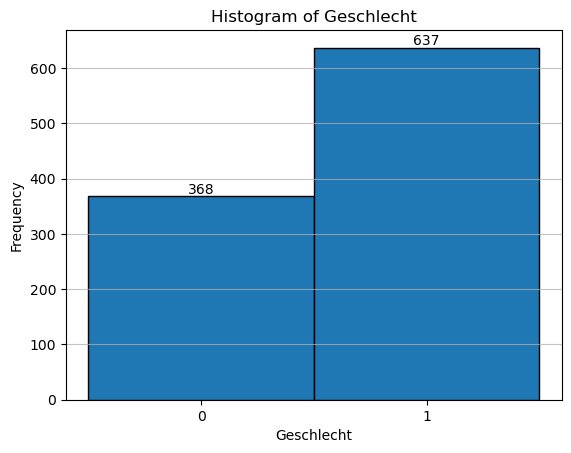

In [22]:
plt.hist(customer_geo_retype['Geschlecht'], bins=[-0.5, 0.5, 1.5], edgecolor='black')  # Bins für 0 und 1 festlegen
plt.xticks([0, 1], ['0', '1'])  # Beschriftungen der x-Achse festlegen
plt.xlabel('Geschlecht')
plt.ylabel('Frequency')
plt.title('Histogram of Geschlecht')
for i in range(2):  # 0 und 1
    count = customer_geo_retype['Geschlecht'].value_counts()[i]
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.grid(axis='y', alpha=0.75)
plt.show()

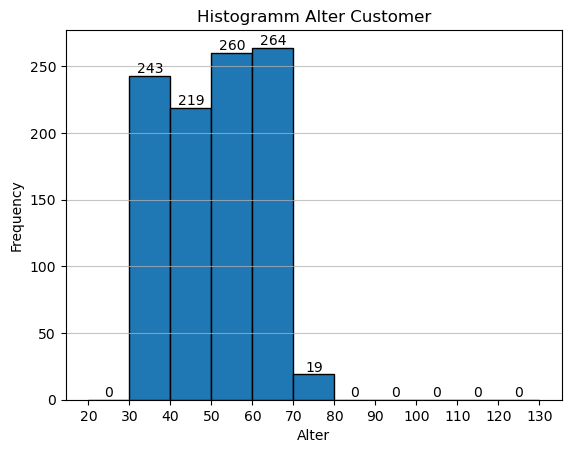

Untergrenze für Ausreißer: 8.5
Obergrenze für Ausreißer: 92.5
Ausreißer:
Empty DataFrame
Columns: [KundeNr, Geschlecht, Alter, Einkommen, Preis, Zeit, Niederlassung]
Index: []
Eine Untergrenze von 8.5 macht keinen Sinn, da in Deutschland erst ab 18 Jahren Auto gefahren werden darf.
Eine Obergrenze von 92.5 macht aus unserer Sicht Sinn, da eine so alte Person bestimmt nicht mehr Auto fahren würden, aber in Einzelfällen ein Auto für eine andere Person Kaufen könnte.
In unserem Fall macht dieses Vorgehen die beiden einzigen über 80 liegenden Altersangaben zu Ausreißern.

Da wir eine moderat linksschiefe und extrem Rechtssteile verteilung vorliegen haben, ersetzen wir beide Werte mit dem Median


In [39]:
n, bins, patches = plt.hist(customer_geo_retype['Alter'], bins=range(20, 140, 10), edgecolor='black')  # Bins von 15 bis 135 in 10er-Schritten festlegen
plt.xticks(range(20, 140, 10))  # 10er-Schritte auf der x-Achse festlegen
plt.xlabel('Alter')
plt.ylabel('Frequency')
plt.title('Histogramm Alter Customer')

# Anzahl der Werte über jedem Balken anzeigen
for i in range(len(patches)):
    height = patches[i].get_height()
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, height, int(height), ha='center', va='bottom')

plt.grid(axis='y', alpha=0.75)  # Gitterlinien hinzufügen
plt.show()

q1 = customer_geo_retype['Alter'].quantile(0.25)
q3 = customer_geo_retype['Alter'].quantile(0.75)
iqr = q3 - q1

# Bestimmen der unteren und oberen Grenzen für Ausreißer
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identifizieren von Ausreißern
outliers = customer_geo_retype[(customer_geo_retype['Alter'] < lower_bound) | (customer_geo_retype['Alter'] > upper_bound)]

print("Untergrenze für Ausreißer:", lower_bound)
print("Obergrenze für Ausreißer:", upper_bound)
print("Ausreißer:")
print(outliers)
print("Eine Untergrenze von 8.5 macht keinen Sinn, da in Deutschland erst ab 18 Jahren Auto gefahren werden darf.")
print("Eine Obergrenze von 92.5 macht aus unserer Sicht Sinn, da eine so alte Person bestimmt nicht mehr Auto fahren würden, aber in Einzelfällen ein Auto für eine andere Person Kaufen könnte.")
print("In unserem Fall macht dieses Vorgehen die beiden einzigen über 80 liegenden Altersangaben zu Ausreißern.")
print(
)
print("Da wir eine moderat linksschiefe und extrem Rechtssteile verteilung vorliegen haben, ersetzen wir beide Werte mit dem Median")    


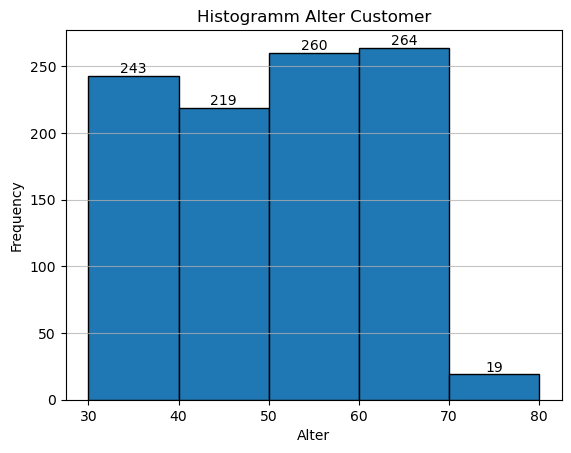

In [40]:
median = customer_geo_retype['Alter'].median()

# Berechnung des Interquartilsabstands (IQR) für die Spalte 'Alter'
q1 = customer_geo_retype['Alter'].quantile(0.25)
q3 = customer_geo_retype['Alter'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

customer_geo_retype['Alter'] = customer_geo_retype['Alter'].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

n, bins, patches = plt.hist(customer_geo_retype['Alter'], bins=range(30, 90, 10), edgecolor='black')  
plt.xticks(range(30, 90, 10))
plt.xlabel('Alter')
plt.ylabel('Frequency')
plt.title('Histogramm Alter Customer')
for i in range(len(patches)):
    height = patches[i].get_height()
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, height, int(height), ha='center', va='bottom')

plt.grid(axis='y', alpha=0.75)
plt.show()

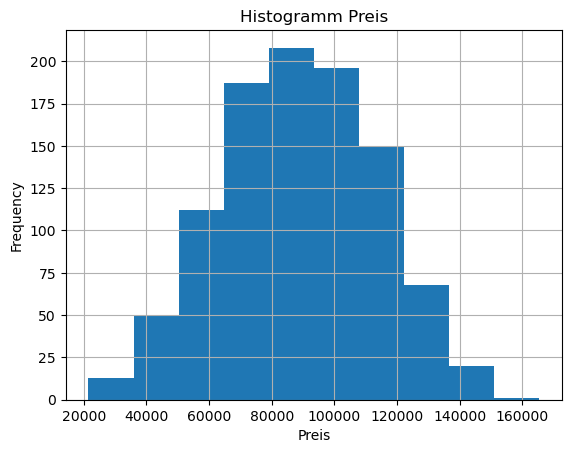

Untergrenze: 15455.235
Obergrenze: 161822.47499999998
Ausreißer:
    KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit  Niederlassung
414   K0415           1   68.0   107689.0  165482.31    60  Niedersachsen


In [25]:
customer_geo_retype['Preis'].hist()
plt.xlabel('Preis')
plt.ylabel('Frequency')
plt.title('Histogramm Preis')
plt.show()

q1 = customer_geo_retype['Preis'].quantile(0.25)
q3 = customer_geo_retype['Preis'].quantile(0.75)
iqr = q3 - q1

# Bestimmen der unteren und oberen Grenzen für Ausreißer
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Untergrenze: {lower_bound}")
print(f"Obergrenze: {upper_bound}")

# Identifizierung der Ausreißer
outliers = customer_geo_retype[(customer_geo_retype['Preis'] < lower_bound) | (customer_geo_retype['Preis'] > upper_bound)]
print("Ausreißer:")
print(outliers)

In [26]:
print(visitor_geo.min())
print(customer_geo.describe())

KundeNr                 K1105
Geschlecht                0.0
Alter                    30.0
Einkommen        10802.033307
Zeit                      3.0
Niederlassung          BERLIN
dtype: object
        Geschlecht        Alter     Einkommen          Preis         Zeit
count  1005.000000  1005.000000  1.005000e+03    1005.000000  1005.000000
mean      0.633831    50.449751  1.053740e+06   88754.552129    44.346269
std       0.481996    12.265843  3.154217e+07   24519.809579    10.859364
min       0.000000    30.000000  1.454700e+04   21471.650000    12.000000
25%       0.000000    40.000000  4.666400e+04   70342.950000    37.000000
50%       1.000000    51.000000  5.901100e+04   88810.940000    44.000000
75%       1.000000    61.000000  7.021200e+04  106934.760000    52.000000
max       1.000000   120.000000  1.000000e+09  165482.310000    80.000000


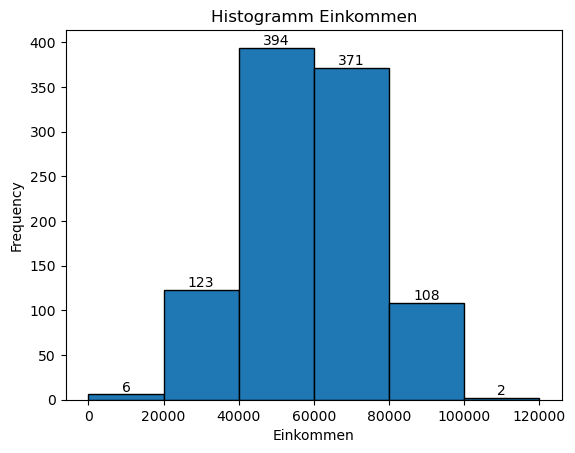

1003 der 1004 Angaben zum Einkommen bewegen sich zwischen 14547 € und 107689€ und sind realistisch
Einer liegt bei 1000000000. Diesen stufen wir als Ausreißer ein.
Er kann eine Fehlangaben, ein Datenverarbeitungsfehler oder ein extremer Einzelfall sein.


In [27]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000]

plt.hist(customer_geo_retype['Einkommen'], bins=bins, edgecolor='black')

plt.xlabel('Einkommen')
plt.ylabel('Frequency')
plt.title('Histogramm Einkommen')
for i in range(len(bins)-1):
    count = ((customer_geo_retype['Einkommen'] >= bins[i]) & (customer_geo_retype['Einkommen'] < bins[i+1])).sum()
    plt.text((bins[i] + bins[i+1]) / 2, count, str(count), ha='center', va='bottom')

plt.show()

print("1003 der 1004 Angaben zum Einkommen bewegen sich zwischen 14547 € und 107689€ und sind realistisch")
print("Einer liegt bei 1000000000. Diesen stufen wir als Ausreißer ein.")
print("Er kann eine Fehlangaben, ein Datenverarbeitungsfehler oder ein extremer Einzelfall sein.")

In [28]:
valid_mean = customer_geo_retype[(customer_geo_retype['Einkommen'] >= 0) & (customer_geo_retype['Einkommen'] <= 500000)]['Einkommen'].mean()

# Ersetzen der Ausreißer durch den Durchschnitt
customer_geo_retype['Einkommen'] = customer_geo_retype['Einkommen'].apply(lambda x: valid_mean if x < 0 or x > 500000 else x)

# Drucken der ersetzen Zeilen (Ausreißer)
replaced_values = customer_geo_retype[(customer_geo_retype['Einkommen'] < 0) | (customer_geo_retype['Einkommen'] > 500000)]

# Ergebnis anzeigen
print("\nDataFrame nach der Ersetzung:")
print(customer_geo_retype.describe())



DataFrame nach der Ersetzung:
        Geschlecht        Alter      Einkommen          Preis         Zeit
count  1005.000000  1005.000000    1005.000000    1005.000000  1005.000000
mean      0.633831    50.332338   58773.894422   88754.552129    44.346269
std       0.481996    11.965546   16580.981158   24519.809579    10.859364
min       0.000000    30.000000   14547.000000   21471.650000    12.000000
25%       0.000000    40.000000   46664.000000   70342.950000    37.000000
50%       1.000000    51.000000   58938.000000   88810.940000    44.000000
75%       1.000000    61.000000   70138.000000  106934.760000    52.000000
max       1.000000    70.000000  107689.000000  165482.310000    80.000000


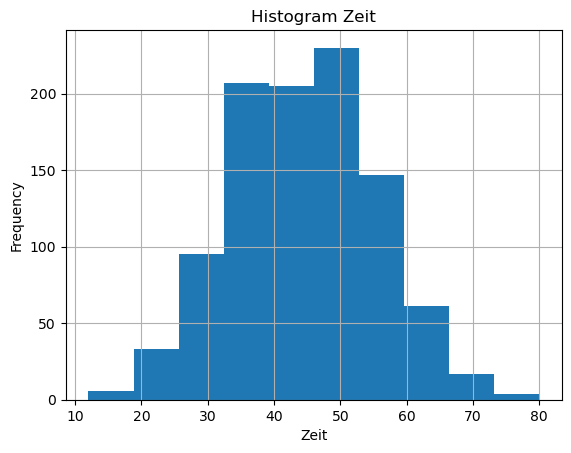

In [29]:
customer_geo_retype['Zeit'].hist()
plt.xlabel('Zeit')
plt.ylabel('Frequency')
plt.title('Histogram Zeit')
plt.show()

In [52]:
q1 = customer_geo_retype['Zeit'].quantile(0.25)
q3 = customer_geo_retype['Zeit'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Untergrenze: {lower_bound}")
print(f"Obergrenze: {upper_bound}")

outliers = customer_geo_retype[(customer_geo_retype['Zeit'] < lower_bound) | (customer_geo_retype['Zeit'] > upper_bound)]
print("Ausreißer:")
print(outliers)

non_outliers_mean = customer_geo_retype[(customer_geo_retype['Zeit'] >= lower_bound) & (customer_geo_retype['Zeit'] <= upper_bound)]['Zeit'].mean()
customer_geo_retype['Zeit'] = customer_geo_retype['Zeit'].apply(lambda x: non_outliers_mean if x < lower_bound or x > upper_bound else x)
print(customer_geo_retype.describe())

print("Wir setzen die Untergrenze in Sachen 'Zeit' auf 20. Wir glauben, dass diese niedrig aber für Einzelfälle Realistisch ist.")
print("Die Obergrenze Setzen wir mit 90 hoch. Wir begründen dies damit,") 
print("dass es nicht umbedingt ungweöhnlich ist bei einem Autokauf genau nachfragende und")
print("länger überlegende Kunden im Geschäft zu haben.")
print("Wir setzen die Obergrenze in erster linie um Messfehler in extremer höhe heraus zu filtern.")

Untergrenze: 16.0
Obergrenze: 72.0
Ausreißer:
Empty DataFrame
Columns: [KundeNr, Geschlecht, Alter, Einkommen, Preis, Zeit, Niederlassung]
Index: []
        Geschlecht        Alter      Einkommen          Preis         Zeit
count  1005.000000  1005.000000    1005.000000    1005.000000  1005.000000
mean      0.633831    50.332338   58773.894422   88754.552129    43.896163
std       0.481996    11.965546   16580.981158   24519.809579     9.703834
min       0.000000    30.000000   14547.000000   21471.650000    20.000000
25%       0.000000    40.000000   46664.000000   70342.950000    37.000000
50%       1.000000    51.000000   58938.000000   88810.940000    43.896163
75%       1.000000    61.000000   70138.000000  106934.760000    51.000000
max       1.000000    70.000000  107689.000000  165482.310000    65.000000
Wir setzen die Untergrenze in Sachen 'Zeit' auf 20. Wir glauben, dass diese niedrig aber für Einzelfälle Realistisch ist.
Die Obergrenze Setzen wir mit 90 hoch. Wir begründen d

In [31]:
# Visuelle & Statistische Ausreißerbereinigung von Customer

In [44]:
print(visitor_geo.describe())

       Geschlecht       Alter      Einkommen        Zeit
count  891.000000  891.000000     891.000000  891.000000
mean     0.578002   49.881033   59367.936188   35.166105
std      0.494156   11.865889   16164.358221   10.476802
min      0.000000   30.000000   10802.033307    3.000000
25%      0.000000   40.000000   47816.611417   28.000000
50%      1.000000   49.000000   59163.823681   35.000000
75%      1.000000   60.000000   71001.378839   43.000000
max      1.000000   70.000000  108569.087021   68.000000


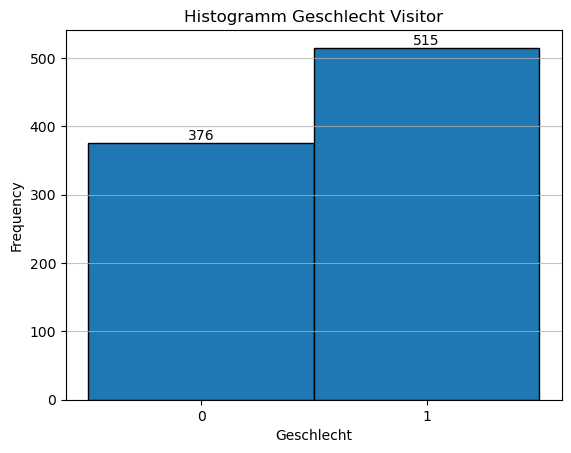

In [32]:
plt.hist(visitor_geo_retype['Geschlecht'], bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Geschlecht')
plt.ylabel('Frequency')
plt.title('Histogramm Geschlecht Visitor')
for i in range(2):  # 0 und 1
    count = visitor_geo_retype['Geschlecht'].value_counts()[i]
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.grid(axis='y', alpha=0.75)
plt.show()

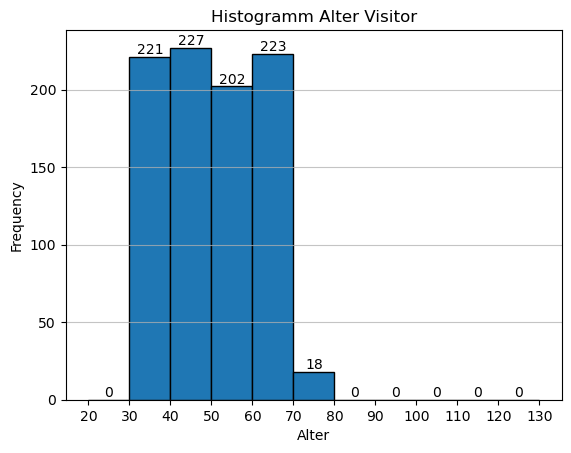

In [35]:
n, bins, patches = plt.hist(visitor_geo_retype['Alter'], bins=range(20, 140, 10), edgecolor='black')  
plt.xticks(range(20, 140, 10))
plt.xlabel('Alter')
plt.ylabel('Frequency')
plt.title('Histogramm Alter Visitor')
for i in range(len(patches)):
    height = patches[i].get_height()
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, height, int(height), ha='center', va='bottom')

plt.grid(axis='y', alpha=0.75)
plt.show()

In [34]:
print("Keine Ausreißer")

Keine Ausreißer


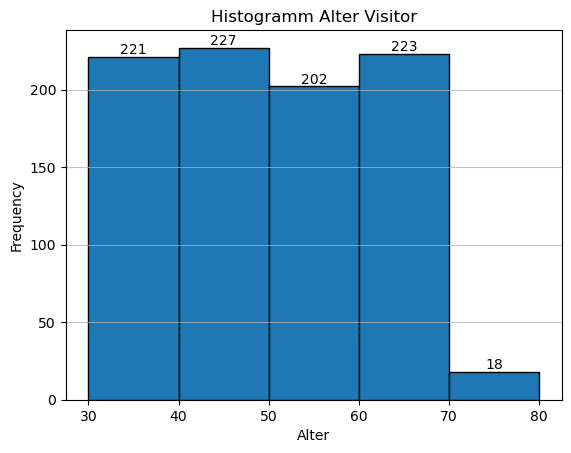

In [38]:
n, bins, patches = plt.hist(visitor_geo_retype['Alter'], bins=range(30, 90, 10), edgecolor='black')  
plt.xticks(range(30, 90, 10))
plt.xlabel('Alter')
plt.ylabel('Frequency')
plt.title('Histogramm Alter Visitor')
for i in range(len(patches)):
    height = patches[i].get_height()
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, height, int(height), ha='center', va='bottom')

plt.grid(axis='y', alpha=0.75)
plt.show()

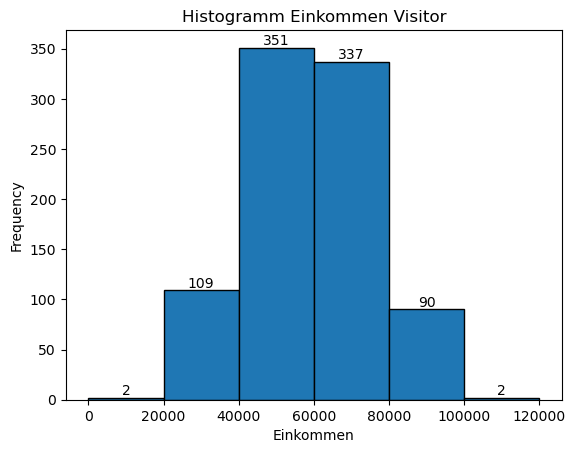

In [42]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000]

plt.hist(visitor_geo_retype['Einkommen'], bins=bins, edgecolor='black')

plt.xlabel('Einkommen')
plt.ylabel('Frequency')
plt.title('Histogramm Einkommen Visitor')
for i in range(len(bins)-1):
    count = ((visitor_geo_retype['Einkommen'] >= bins[i]) & (visitor_geo_retype['Einkommen'] < bins[i+1])).sum()
    plt.text((bins[i] + bins[i+1]) / 2, count, str(count), ha='center', va='bottom')

plt.show()

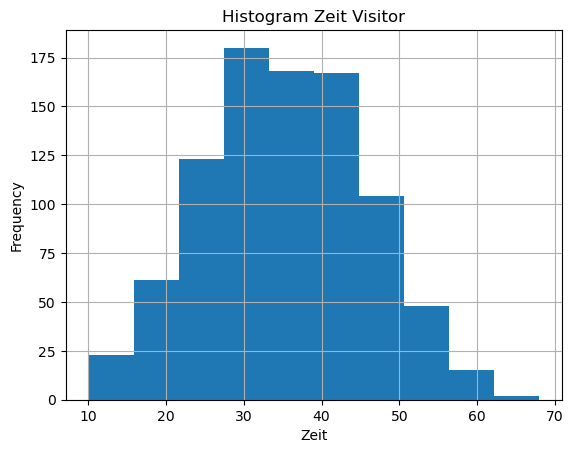

In [53]:
visitor_geo_retype['Zeit'].hist()
plt.xlabel('Zeit')
plt.ylabel('Frequency')
plt.title('Histogram Zeit Visitor')
plt.show()

In [51]:
q1 = visitor_geo_retype['Zeit'].quantile(0.25)
q3 = visitor_geo_retype['Zeit'].quantile(0.75)
iqr = q3 - q1

# Bestimmen der unteren und oberen Grenzen für Ausreißer
lower_bound = 10
upper_bound = 90

print(f"Untergrenze: {lower_bound}")
print(f"Obergrenze: {upper_bound}")

outliers = visitor_geo_retype[(visitor_geo_retype['Zeit'] < lower_bound) | (visitor_geo_retype['Zeit'] > upper_bound)]
print("Ausreißer:")
print(outliers)

non_outliers_mean = visitor_geo_retype[(visitor_geo_retype['Zeit'] >= lower_bound) & (visitor_geo_retype['Zeit'] <= upper_bound)]['Zeit'].mean()

visitor_geo_retype['Zeit'] = visitor_geo_retype['Zeit'].apply(lambda x: non_outliers_mean if x < lower_bound or x > upper_bound else x)

print(visitor_geo_retype.describe())

Untergrenze: 10
Obergrenze: 90
Ausreißer:
    KundeNr  Geschlecht  Alter  Einkommen  Zeit        Niederlassung
52    K1157           0     30   30096.84     8            Thüringen
91    K1196           1     43   37696.63     7        Niedersachsen
442   K1547           1     40   39581.25     5        Niedersachsen
518   K1623           1     31   38298.53     3  Nordrhein-Westfalen
864   K1969           1     51   70533.44     7    Baden-Württemberg
       Geschlecht       Alter      Einkommen        Zeit
count  891.000000  891.000000     891.000000  891.000000
mean     0.578002   49.881033   59367.936049   35.330700
std      0.494156   11.865889   16164.358263   10.243995
min      0.000000   30.000000   10802.030000   10.000000
25%      0.000000   40.000000   47816.610000   28.000000
50%      1.000000   49.000000   59163.820000   35.000000
75%      1.000000   60.000000   71001.380000   43.000000
max      1.000000   70.000000  108569.090000   68.000000


In [54]:
print("Wir setzen die Untergrenze in Sachen 'Zeit' auf 10 Wir glauben, dass diese niedrig aber für Einzelfälle Realistisch ist.")
print("Die Obergrenze Setzen wir mit 90 hoch. Wir begründen dies damit,") 
print("dass es nicht umbedingt ungweöhnlich ist bei einem Autokauf genau nachfragende und")
print("länger überlegende Kunden im Geschäft zu haben.")
print("Wir setzen die Obergrenze in erster linie um Messfehler in extremer höhe heraus zu filtern.")

Wir setzen die Untergrenze in Sachen 'Zeit' auf 10 Wir glauben, dass diese niedrig aber für Einzelfälle Realistisch ist.
Die Obergrenze Setzen wir mit 90 hoch. Wir begründen dies damit,
dass es nicht umbedingt ungweöhnlich ist bei einem Autokauf genau nachfragende und
länger überlegende Kunden im Geschäft zu haben.
Wir setzen die Obergrenze in erster linie um Messfehler in extremer höhe heraus zu filtern.


In [86]:
print(customer_geo_retype.describe())
print(customer_geo_retype)
print(
)
print(visitor_geo_retype.describe())
print(visitor_geo_retype)

        Geschlecht        Alter      Einkommen          Preis         Zeit
count  1005.000000  1005.000000    1005.000000    1005.000000  1005.000000
mean      0.633831    50.332338   58773.894422   88754.552129    43.896163
std       0.481996    11.965546   16580.981158   24519.809579     9.703834
min       0.000000    30.000000   14547.000000   21471.650000    20.000000
25%       0.000000    40.000000   46664.000000   70342.950000    37.000000
50%       1.000000    51.000000   58938.000000   88810.940000    43.896163
75%       1.000000    61.000000   70138.000000  106934.760000    51.000000
max       1.000000    70.000000  107689.000000  165482.310000    65.000000
     KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit  \
0      K0001           1   68.0    89437.0  114481.90  62.0   
1      K0002           1   58.0    65271.0  106258.99  44.0   
2      K0003           1   44.0    48195.0   85705.57  29.0   
3      K0004           0   37.0    48957.0   76412.36  36.0   
4      K00

In [118]:
# KundeNr als Index setzen
customer_geo_retype.set_index('KundeNr', inplace=True)
visitor_geo_retype.set_index('KundeNr', inplace=True)

# Auswahl der gewünschten Spalten
customer_geo_retype = customer_geo_retype[['Geschlecht', 'Alter', 'Einkommen', 'Niederlassung', 'Zeit', 'Preis']]
visitor_geo_retype = visitor_geo_retype[['Geschlecht', 'Alter', 'Einkommen', 'Niederlassung', 'Zeit']]

# Zusammenführen der DataFrames
df = pd.concat([customer_geo_retype, visitor_geo_retype])

# Ausgabe des resultierenden DataFrames
print(df)

KeyError: "None of ['KundeNr'] are in the columns"

In [89]:
all_customer_numbers = [f'K{str(i).zfill(4)}' for i in range(1, 1996)]

# Finden der fehlenden Kundennummern
missing_customer_numbers = set(all_customer_numbers) - set(df.index)

# Ausgabe der fehlenden Kundennummern
print("Fehlende Kundennummern:")
print(sorted(missing_customer_numbers))
all_customer_numbers = [f'K{str(i).zfill(4)}' for i in range(1, 1996)]

# Finden der fehlenden Kundennummern
missing_customer_numbers = sorted(set(all_customer_numbers) - set(df.index))

# Erstellen eines DataFrames mit den fehlenden Kundennummern
missing_df = pd.DataFrame(index=missing_customer_numbers, columns=df.columns)
missing_df.index.name = 'KundeNr'

# Ausgabe der fehlenden Kundennummern als fehlende Zeilen
print("Fehlende Zeilen:")
print(missing_df)

Fehlende Kundennummern:
['K1006', 'K1007', 'K1008', 'K1009', 'K1010', 'K1011', 'K1012', 'K1013', 'K1014', 'K1015', 'K1016', 'K1017', 'K1018', 'K1019', 'K1020', 'K1021', 'K1022', 'K1023', 'K1024', 'K1025', 'K1026', 'K1027', 'K1028', 'K1029', 'K1030', 'K1031', 'K1032', 'K1033', 'K1034', 'K1035', 'K1036', 'K1037', 'K1038', 'K1039', 'K1040', 'K1041', 'K1042', 'K1043', 'K1044', 'K1045', 'K1046', 'K1047', 'K1048', 'K1049', 'K1050', 'K1051', 'K1052', 'K1053', 'K1054', 'K1055', 'K1056', 'K1057', 'K1058', 'K1059', 'K1060', 'K1061', 'K1062', 'K1063', 'K1064', 'K1065', 'K1066', 'K1067', 'K1068', 'K1069', 'K1070', 'K1071', 'K1072', 'K1073', 'K1074', 'K1075', 'K1076', 'K1077', 'K1078', 'K1079', 'K1080', 'K1081', 'K1082', 'K1083', 'K1084', 'K1085', 'K1086', 'K1087', 'K1088', 'K1089', 'K1090', 'K1091', 'K1092', 'K1093', 'K1094', 'K1095', 'K1096', 'K1097', 'K1098', 'K1099', 'K1100', 'K1101', 'K1102', 'K1103', 'K1104']


In [122]:
print(customer_geo_retype)

# Erstellen eines neuen Indexes von K1006 bis K1896
new_index = [f'K{i:04d}' for i in range(1006, 1006 + len(visitor_geo_retype))]

# Setzen des neuen Indexes
visitor_geo_retype.index = new_index
print(visitor_geo_retype)

         Geschlecht  Alter  Einkommen        Niederlassung  Zeit      Preis
KundeNr                                                                    
K0001             1   68.0    89437.0              Sachsen  62.0  114481.90
K0002             1   58.0    65271.0  Nordrhein-Westfalen  44.0  106258.99
K0003             1   44.0    48195.0               Hessen  29.0   85705.57
K0004             0   37.0    48957.0               Bayern  36.0   76412.36
K0005             0   50.0    56621.0               Bayern  40.0   92898.67
...             ...    ...        ...                  ...   ...        ...
K1001             0   55.0    66861.0               Bayern  54.0   97465.12
K1002             0   41.0    38996.0               Bayern  28.0   66237.40
K1003             1   55.0    60489.0               Bayern  47.0  105741.80
K1004             1   42.0    41463.0    Baden-Württemberg  43.0   74976.67
K1005             1   69.0    84021.0    Baden-Württemberg  56.0  133358.19

[1005 rows 

In [92]:
# Auswahl der gewünschten Spalten
customer_geo_retype = customer_geo_retype[['Geschlecht', 'Alter', 'Einkommen', 'Niederlassung', 'Zeit', 'Preis']]
visitor_geo_retype = visitor_geo_retype[['Geschlecht', 'Alter', 'Einkommen', 'Niederlassung', 'Zeit']]

# Zusammenführen der DataFrames
df = pd.concat([customer_geo_retype, visitor_geo_retype])

# Entfernen von Zeilen mit fehlenden Werten (optional, wenn notwendig)
df.dropna(how='all', inplace=True)

# Neuer Index von 'K0001' bis 'K1894'
new_index = [f'K{str(i).zfill(4)}' for i in range(1, len(df) + 1)]
df.index = new_index

# Ausgabe des DataFrames mit dem neuen Index
print(df)

       Geschlecht  Alter  Einkommen        Niederlassung  Zeit      Preis
K0001           1   68.0   89437.00              Sachsen  62.0  114481.90
K0002           1   58.0   65271.00  Nordrhein-Westfalen  44.0  106258.99
K0003           1   44.0   48195.00               Hessen  29.0   85705.57
K0004           0   37.0   48957.00               Bayern  36.0   76412.36
K0005           0   50.0   56621.00               Bayern  40.0   92898.67
...           ...    ...        ...                  ...   ...        ...
K1892           1   48.0   59967.31               Hessen  21.0        NaN
K1893           1   67.0   81521.76    Baden-Württemberg  21.0        NaN
K1894           0   40.0   41616.57  Nordrhein-Westfalen  48.0        NaN
K1895           1   49.0   76602.79               Berlin  19.0        NaN
K1896           1   49.0   54754.53               Berlin  44.0        NaN

[1896 rows x 6 columns]


In [94]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1896 entries, K0001 to K1896
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geschlecht     1896 non-null   int32  
 1   Alter          1896 non-null   float64
 2   Einkommen      1896 non-null   float64
 3   Niederlassung  1896 non-null   object 
 4   Zeit           1896 non-null   float64
 5   Preis          1005 non-null   float64
dtypes: float64(4), int32(1), object(1)
memory usage: 96.3+ KB
None


In [95]:
df = df.astype({'Geschlecht': int, 'Alter': int, 'Zeit': int})
print(df)
print(
    )
print(df.dtypes)

       Geschlecht  Alter  Einkommen        Niederlassung  Zeit      Preis
K0001           1     68   89437.00              Sachsen    62  114481.90
K0002           1     58   65271.00  Nordrhein-Westfalen    44  106258.99
K0003           1     44   48195.00               Hessen    29   85705.57
K0004           0     37   48957.00               Bayern    36   76412.36
K0005           0     50   56621.00               Bayern    40   92898.67
...           ...    ...        ...                  ...   ...        ...
K1892           1     48   59967.31               Hessen    21        NaN
K1893           1     67   81521.76    Baden-Württemberg    21        NaN
K1894           0     40   41616.57  Nordrhein-Westfalen    48        NaN
K1895           1     49   76602.79               Berlin    19        NaN
K1896           1     49   54754.53               Berlin    44        NaN

[1896 rows x 6 columns]

Geschlecht         int32
Alter              int32
Einkommen        float64
Niederlassu

In [114]:
print(customer_geo_retype.describe())

print(visitor_geo_retype.describe())

        Geschlecht        Alter      Einkommen         Zeit          Preis
count  1005.000000  1005.000000    1005.000000  1005.000000    1005.000000
mean      0.633831    50.332338   58773.894422    43.896163   88754.552129
std       0.481996    11.965546   16580.981158     9.703834   24519.809579
min       0.000000    30.000000   14547.000000    20.000000   21471.650000
25%       0.000000    40.000000   46664.000000    37.000000   70342.950000
50%       1.000000    51.000000   58938.000000    43.896163   88810.940000
75%       1.000000    61.000000   70138.000000    51.000000  106934.760000
max       1.000000    70.000000  107689.000000    65.000000  165482.310000
       Geschlecht       Alter      Einkommen        Zeit
count  891.000000  891.000000     891.000000  891.000000
mean     0.578002   49.881033   59367.936049   35.330700
std      0.494156   11.865889   16164.358263   10.243995
min      0.000000   30.000000   10802.030000   10.000000
25%      0.000000   40.000000   47816.61

In [88]:
# Aufgabe 1: Wie viele Autos wurden verkauft?

In [101]:
verkaufte_Autos = df[df['Preis'].notna()]
Anzahl_verkaufter_Autos = len(verkaufte_Autos)

print(f"Es wurden {Anzahl_verkaufter_Autos} Autos verkauft.")

Es wurden 1005 Autos verkauft.


In [56]:
# Aufgabe 2: Was ist der Höchst-, Mindest- und Durchschnittspreis der verkauften Autos?

In [113]:
# Min, Max und Mean der Spalte 'Preis'
preis_min = df['Preis'].min()
preis_max = df['Preis'].max()
preis_mean = df['Preis'].mean().round(2)

# Ausgabe der Ergebnisse
print(f"Der Mindestpreis ist:          {preis_min:,}€")
print(f"Der Maximalpreis ist:         {preis_max:,}€")
print(f"Der Durchschnittspreis ist:    {preis_mean:,}€")

Der Mindestpreis ist:          21,471.65€
Der Maximalpreis ist:         165,482.31€
Der Durchschnittspreis ist:    88,754.55€


In [57]:
# Aufgabe 3: Wie hoch war der Gesamtumsatz?

In [112]:
Gesamtumsatz = df['Preis'].sum()
print(f"Der Gesamtumsatz liegt bei: {Gesamtumsatz:,}€")

Der Gesamtumsatz liegt bei: 89,198,324.89€


In [58]:
# Aufgabe 4: Wie viele Autos wurden pro Bundesland verkauft?

In [59]:
# Aufgabe 5: Wie hoch war der durchschnittliche Umsatz pro Bundesland?

In [60]:
# Aufgabe 6: In welchem Bundesland wurde das teuerste Auto verkauft?

In [61]:
# Aufgabe 7: Haben mehr Frauen oder mehr Männer unsere Autos gekauft?

In [62]:
# Aufgabe 8: Wie hoch ist das Durchschnittsalter unserer Kunden? Wie hoch ist das Durchschnittsalter unserer Besucher?

In [63]:
# Aufgabe 9: Wie hoch ist das Durchschnittseinkommen unserer Kunden? Wie hoch ist das Durchschnittseinkommen unserer Besucher?

In [64]:
# Aufgabe 10: Bestimmen Sie, ob es einen statistisch signifikanten Unterschied zwischen dem Durchschnittseinkommen der Kunden 
#             und dem Durchschnittseinkommen der Besucher gibt.

In [124]:
from scipy.stats import ttest_ind

# Beispielgruppen aus den beiden DataFrames
einkommen_der_kunden = customer_geo_retype['Einkommen']
einkommen_der_besucher = visitor_geo_retype['Einkommen']

# Welch-T-Test
t_stat, p_value = ttest_ind(einkommen_der_kunden, einkommen_der_besucher, equal_var=False)

print(f"Welch's T-Statistik: {t_stat}")
print(f"P-Wert: {p_value}")

Welch's T-Statistik: -0.7890370219050445
P-Wert: 0.43019001794209055


In [65]:
# Aufgabe 11: Wie hoch ist die Korrelation (Pearson-Korrelation) zwischen den Variablen Alter, Einkommen, Preis und Zeit?

In [66]:
# Aufgabe 12: Testen Sie grafisch mit Hilfe eines qq-Plots, ob die Variable Zeit approximativ normalverteilt ist.

In [67]:
# Aufgabe 13: Wie viele Kunden haben keinen Bankkredit aufgenommen, um das Auto zu kaufen?
#             Kundenabteilung hat vergessen, diese Informationen zu erfassen. Wir können davon aus
#             gehen, dass die Kunden mit einem Jahreseinkommen höher als der Autopreis keinen Kredit
#             aufgenommen haben.

In [68]:
# Aufgabe 14: Welche sozioökonomischen Merkmale beeinflussen den Kaufpreis? Wählen Sie die geeigneten
#             unabhängigen Variablen aus und schätzen Sie eine Regression unter Verwendung der geeigneten Methode.

In [69]:
# Aufgabe 15: Prognostizieren Sie den Kaufpreis eines unserer Autos für einen männlichen Kunden im
#             Alter von 32 Jahren mit einem Einkommen von 30.000 Euro. Prognostizieren Sie den Kaufpreis
#             preis eines unserer Autos für einen männlichen Kunden im Alter von 51 Jahren und mit
#             einem Einkommen von 54.000 Euro.

In [70]:
# Aufgabe 16: In Bezug auf die vorherige Frage: Welche Variable beeinflusst den Preis des Autos am
#             meisten? Mit anderen Worten: Die von Ihnen geschätzten Regressionskoeffizienten müssen
#             direkt vergleichbar sein. Wie sollen die Daten transformiert werden?

In [71]:
# Aufgabe 17: Schätzen Sie eine Regression, die die Wahrscheinlichkeit des Kaufs eines Autos ermittelt.
#             Verwenden Sie die entsprechende Methode.

In [72]:
# Aufgabe 18: Wie hoch ist die Wahrscheinlichkeit, dass ein 32-jähriger männlicher Kunde mit einem
#             Einkommen von 30.000 Euro, der das Auto 30 Minuten lang getestet hat, eines unserer
#             Modelle kauft? Wie hoch ist die Wahrscheinlichkeit, dass ein 51-jähriger männlicher Kunde
#             mit einem Einkommen von 54.000 Euro, der das Auto 45 Minuten lang getestet hat, eines
#             unserer Modelle kauft?

In [73]:
# Aufgabe 19: Auf welche Probleme sind Sie bei der Zusammenführung des Datensatzes gestoßen? Stellen
#             len Sie die Operationen vor, die Sie zum Zusammenführen und Bereinigen der Daten
#             durchgeführt haben.

In [74]:
# Aufgabe 20: Welche Vorschläge würden Sie der Kundenabteilung für die Umfrage im nächsten Jahr machen?
#             Welche zusätzlichen Informationen sollten gesammelt werden? 
#             Formulieren Sie zwei Vorschläge.